In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Loading ESG rating data
esg = pd.read_csv('Data/esg_score.csv')
esg.head()

,Unnamed: 0,Total ESG Score,Environment,Social,Governance,Controversy Score
0,MMM,35,12.8,14.0,8.4,3
1,ABT,30,3.0,16.2,10.6,3
2,ABBV,29,0.6,17.1,11.3,3
3,ACN,11,0.6,5.0,5.8,2
4,ATVI,17,0.2,10.7,6.2,2


In [3]:
firms = pd.read_csv('Data/firm_info.csv')
firms.head()

,Unnamed: 0,ticker,Sector,Industry,Headquarter
0,0,MMM,Industrials,Industrial Conglomerates,"St. Paul, Minnesota"
1,1,ABT,Health Care,Health Care Equipment,"North Chicago, Illinois"
2,2,ABBV,Health Care,Pharmaceuticals,"North Chicago, Illinois"
3,3,ABMD,Health Care,Health Care Equipment,"Danvers, Massachusetts"
4,4,ACN,Information Technology,IT Consulting & Other Services,"Dublin, Ireland"


In [4]:
#Rename first column
esg = esg.rename(columns={'Unnamed: 0': 'Ticker'})
firms = firms.rename(columns={'ticker':'Ticker'})

In [5]:
#Check for null values
np.sum(firms.isna())

Unnamed: 0     0
Ticker         0
Sector         0
Industry       0
Headquarter    0
dtype: int64

In [6]:
esg.head()

,Ticker,Total ESG Score,Environment,Social,Governance,Controversy Score
0,MMM,35,12.8,14.0,8.4,3
1,ABT,30,3.0,16.2,10.6,3
2,ABBV,29,0.6,17.1,11.3,3
3,ACN,11,0.6,5.0,5.8,2
4,ATVI,17,0.2,10.7,6.2,2


In [7]:
#Concatenate the two data frames
df = pd.merge(firms, esg, on='Ticker') 

In [8]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Ticker,Sector,Industry,Headquarter,Total ESG Score,Environment,Social,Governance,Controversy Score
0,MMM,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",35,12.8,14.0,8.4,3
1,ABT,Health Care,Health Care Equipment,"North Chicago, Illinois",30,3.0,16.2,10.6,3
2,ABBV,Health Care,Pharmaceuticals,"North Chicago, Illinois",29,0.6,17.1,11.3,3
3,ACN,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",11,0.6,5.0,5.8,2
4,ATVI,Communication Services,Interactive Home Entertainment,"Santa Monica, California",17,0.2,10.7,6.2,2


In [9]:
df.to_csv('Data/df.csv')

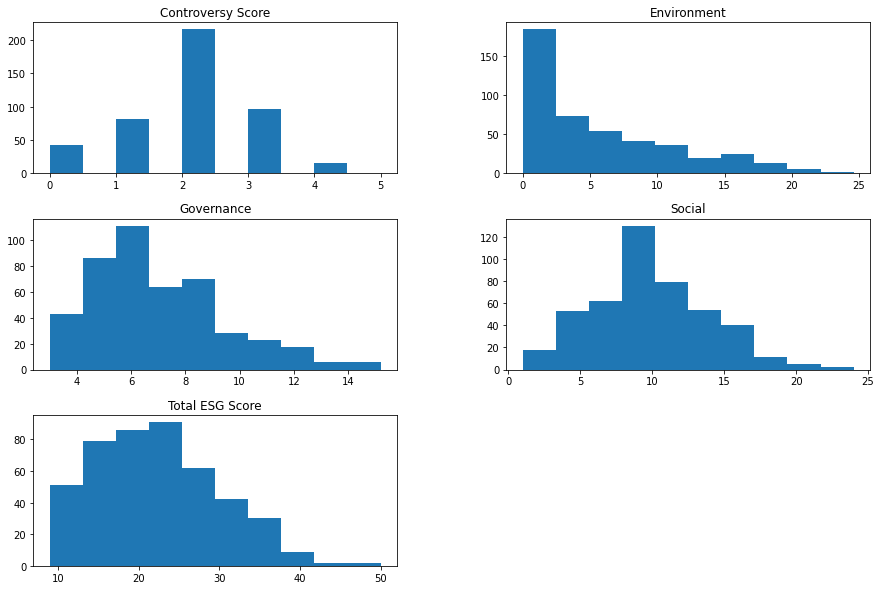

In [10]:
esg.hist(grid=False, figsize=(15, 10));
plt.savefig('Data/hist.jpg', quality=95, bbox_inches='tight')

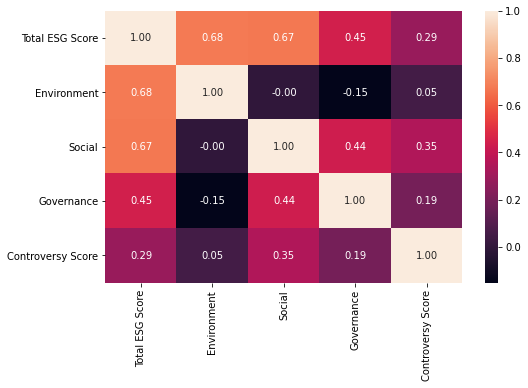

In [11]:
#Potential factors of Total ESG Score and Controversy Score
plt.figure(figsize=(8, 5))
sns.heatmap(esg.corr(), annot=True, fmt='.2f');
plt.savefig('Data/output.jpg', quality=95, bbox_inches='tight')

In [12]:
np.sum(df.isnull())

Ticker               0
Sector               0
Industry             0
Headquarter          0
Total ESG Score      0
Environment          0
Social               0
Governance           0
Controversy Score    0
dtype: int64

In [13]:
df.shape

(452, 9)

In [14]:
df.describe()

,Total ESG Score,Environment,Social,Governance,Controversy Score
count,452.000000,452.000000,452.000000,452.000000,452.000000
mean,22.579646,5.649336,9.854425,7.069690,1.918142
std,7.423540,5.470771,3.977459,2.425673,0.960381
min,9.000000,0.000000,1.000000,3.000000,0.000000
25%,17.000000,1.500000,7.000000,5.075000,1.000000
50%,22.000000,4.000000,9.650000,6.300000,2.000000
75%,27.000000,9.000000,12.225000,8.200000,2.250000
max,50.000000,24.600000,24.000000,15.200000,5.000000


In [15]:
sector_overview = df.groupby(['Sector'], sort=False).mean()

In [16]:
cm = sns.light_palette("blue", as_cmap=True)

s = sector_overview.style.background_gradient(cmap=cm, high=0)
s

,Total ESG Score,Environment,Social,Governance,Controversy Score
Sector,,,,,
Industrials,25.523810,7.163492,11.833333,6.587302,1.825397
Health Care,23.175439,2.015789,13.049123,8.156140,2.140351
Information Technology,17.590909,3.065152,8.075758,6.260606,1.378788
Communication Services,19.944444,1.338889,10.483333,8.300000,2.444444
Consumer Discretionary,19.310345,4.425862,9.094828,5.839655,2.206897
Utilities,30.592593,14.555556,10.144444,5.974074,2.185185
Financials,22.666667,1.520000,10.515000,10.545000,2.033333
Materials,26.913043,13.404348,7.191304,6.439130,2.043478
Real Estate,14.034483,4.196552,4.527586,5.158621,0.689655


In [21]:
#Categorical data: create dummy variables
df = pd.concat([df.drop(['Sector'], axis=1), pd.get_dummies(df['Sector'], drop_first=True, dummy_na=False)], axis=1)

In [22]:
df.head()

,Ticker,Industry,Headquarter,Total ESG Score,Environment,Social,Governance,Controversy Score,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
0,MMM,Industrial Conglomerates,"St. Paul, Minnesota",35,12.8,14.0,8.4,3,0,0,0,0,0,1,0,0,0,0
1,ABT,Health Care Equipment,"North Chicago, Illinois",30,3.0,16.2,10.6,3,0,0,0,0,1,0,0,0,0,0
2,ABBV,Pharmaceuticals,"North Chicago, Illinois",29,0.6,17.1,11.3,3,0,0,0,0,1,0,0,0,0,0
3,ACN,IT Consulting & Other Services,"Dublin, Ireland",11,0.6,5.0,5.8,2,0,0,0,0,0,0,1,0,0,0
4,ATVI,Interactive Home Entertainment,"Santa Monica, California",17,0.2,10.7,6.2,2,0,0,0,0,0,0,0,0,0,0


In [23]:
#Pull a list of the column names of the categorical variables
cat_df = df.select_dtypes(include=['object'])
cat_cols_lst = cat_df.columns
cat_cols_lst

Index(['Ticker', 'Industry', 'Headquarter'], dtype='object')

In [24]:
#Split data
X = df.drop(list(cat_cols_lst) + ['Total ESG Score'], axis=1)
y = df['Total ESG Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)
#Predicting
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)
#Scoring
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)
print(test_score, train_score)

0.995324432080025 0.9954911034538384


In [26]:
#Split data
X = df.drop(list(cat_cols_lst) + ['Controversy Score'], axis=1)
y = df['Controversy Score']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.3, random_state=42)
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)
#Predict and score the model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)
#Scoring
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)
print(test_score, train_score)

0.297776677514463 0.23959915754823735


In [ ]:
# How is controversy scores calculated, how to interpret?